# Visualization of generated .png Copernicus Hub L1c patches against MARIDA patches 
This notebook visualizes the bands of a generated .png L1C patches of Copernicus Hub that were shifted and cropped to make them similar to the MARIDA patches and their corresponding MARIDA bands.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import matplotlib.pyplot as plt

from anomalymarinedetection.utils.constants import COP_HUB_BASE_NAME
from anomalymarinedetection.utils.utils import acquire_data, number_starting_with_zero_2_number

In [3]:
marida_patches_path = "/data/anomaly-marine-detection/data/patches/"
shifted_and_cropped_cop_hub_patches_path = "/data/anomaly-marine-detection/data/l1c_copernicus_hub/images_after_keypoint_matching"

# MARIDA excluded bands B09 and B10 => bands to use to do keypoints matching:
# B01, B02, B03, B04, B05, B06, B07, B08, B8A, B11, B12
BAND_NAMES_IN_MARIDA = ["B01", "B02", "B03", "B04", "B05", "B06", "B07", "B08", "B8A", "B11", "B12"]

number = "6"
ext = ".tif"
marida_patch_name = "S2_29-8-17_51RVQ"
L1C = "_l1c_" 

band_cop_hub = "B04"

if band_cop_hub == "B09" or band_cop_hub == "B10":
    raise Exception("MARIDA removed bands B09 and B10")
elif band_cop_hub == "B11" or band_cop_hub == "B12":
    # we subtract 2 if it is band B11 or B12 due to the removal of previous bands B09 and B10
    band_marida = int(number_starting_with_zero_2_number(band_cop_hub[-2:])) - 2
elif band_cop_hub == "B8A":
    band_marida = 8
else:   
    band_marida = int(number_starting_with_zero_2_number(band_cop_hub[-2:])) - 1

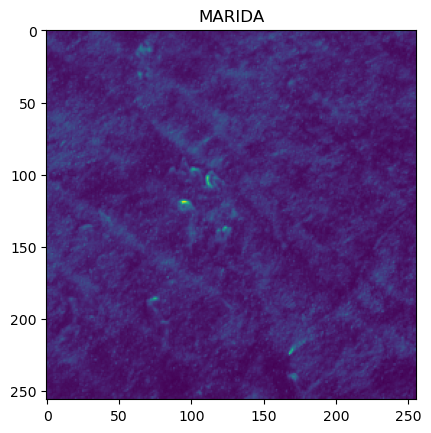

In [4]:
marida_path = os.path.join(marida_patches_path, marida_patch_name, marida_patch_name + "_" + number + ext)
img_marida, _ = acquire_data(marida_path)
plt.title("MARIDA")
plt.imshow(img_marida[:, :, band_marida])

(256, 256, 1)


/opt/conda/envs/anomaly-marine-detection/lib/python3.10/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


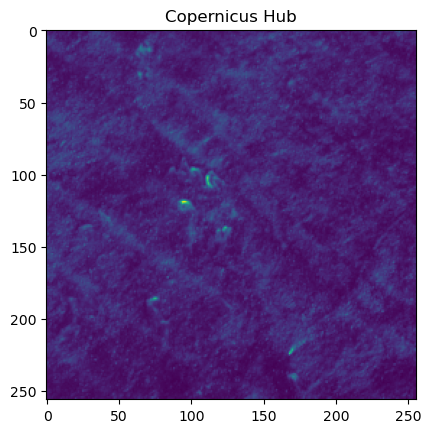

In [5]:
img_cop_hub_shifted_and_cropped, _ = acquire_data(
    os.path.join(
        shifted_and_cropped_cop_hub_patches_path,
        COP_HUB_BASE_NAME + "_" + 
        marida_patch_name + "_" + 
        number + "_" + band_cop_hub + "_shifted.png",)
)
print(img_cop_hub_shifted_and_cropped.shape)
plt.title("Copernicus Hub")
plt.imshow(img_cop_hub_shifted_and_cropped)

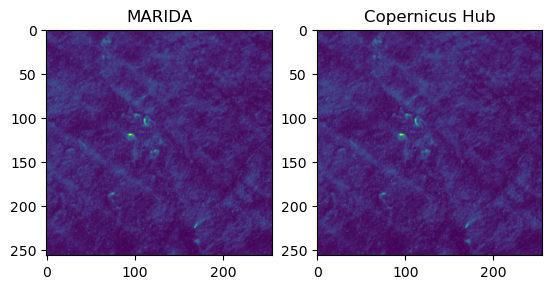

In [6]:
fig, ax = plt.subplots(1, 2)
ax[0].set_title("MARIDA")
ax[0].imshow(img_marida[:, :, band_marida] / img_marida[:, :, band_marida].max())
ax[1].set_title("Copernicus Hub")
ax[1].imshow(img_cop_hub_shifted_and_cropped / img_cop_hub_shifted_and_cropped.max())